**Importando Bibliotecas**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.stats import norm, t

**Ibovespa Retorno**

In [4]:
ibov = yf.download("^BVSP")[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov

In [6]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [7]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.15%


In [8]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.26%


**Anos que o Ibovespa teve uma queda de 12%**

In [18]:
ibov[ibov["retorno"] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


**Qual a probabilidade do Ibovespa cair mais de 12%**

In [19]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000376%


In [20]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 26567649 dias
Ou uma vez a cada 105427 anos


**Gráfico Retorno Diário do Ibovespa**

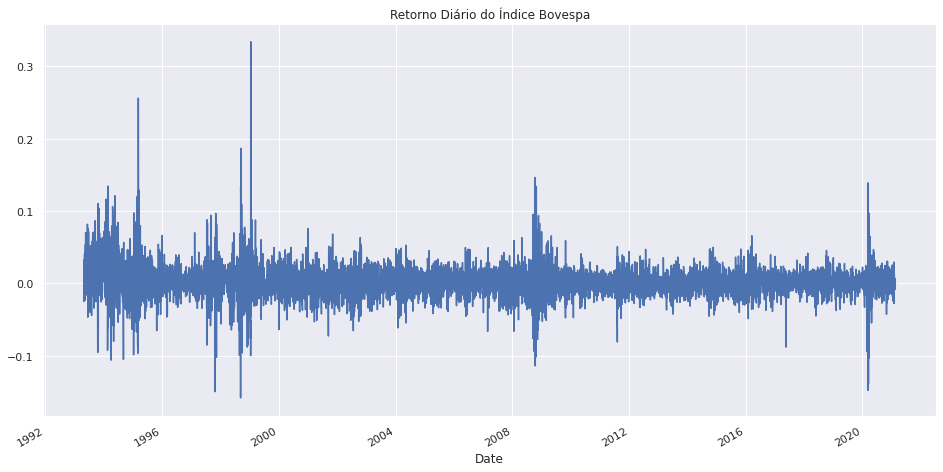

In [21]:
ibov['retorno'].plot(title="Retorno Diário do Índice Bovespa");

**Gráfico do Retorno Normalmente do Ibovespa**

In [30]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size,  loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

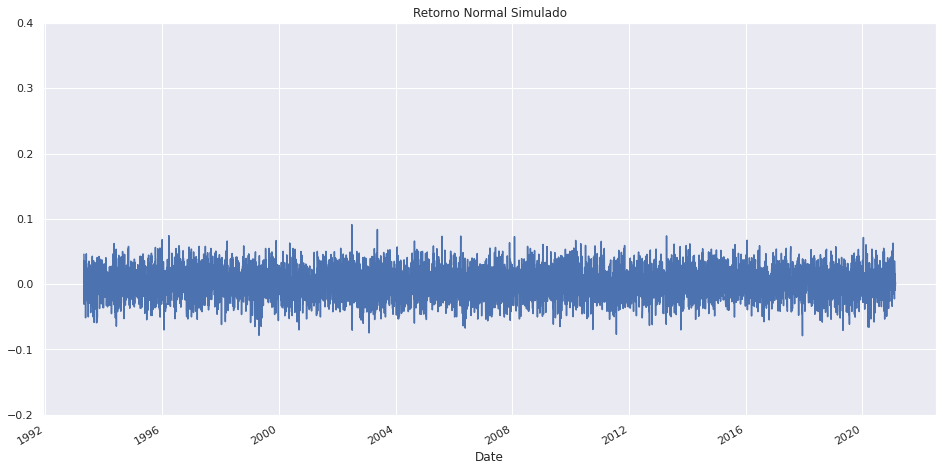

In [23]:
ax = ibov['retorno_teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

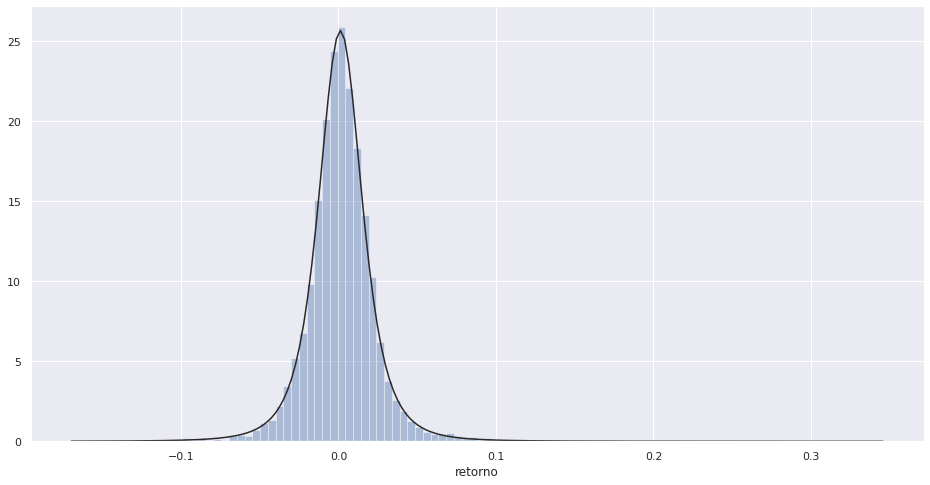

In [24]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=t);

In [25]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.27 
Média=0.0012 
Desvio padrão=0.01443


**Probabilidades com Frequência Teórica**

In [26]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.12657152%


In [27]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 790 dias
Ou uma vez a cada 3 anos


In [28]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 26567649 dias
Ou uma vez a cada 105427 anos


**Na Vida Real...**

In [29]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 1375 dias
